# 音声のフーリエ変換

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft
import scipy.signal as ss
import scipy.io.wavfile as wav
import matplotlib.mlab as mlab

# import cis

## フーリエ変換

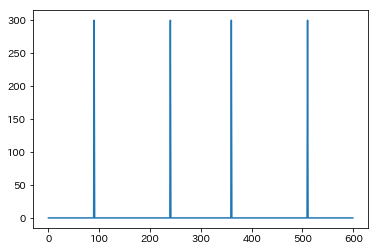

In [9]:
fs = 100
t = np.arange(0, 7, 1/fs)

y = np.sin(2*np.pi*15*t) + np.cos(2*np.pi*40*t)
cs = sfft.fft(y[:600])

plt.plot(np.abs(cs))
plt.show()

信号yに対する600点の離散フーリエ変換．

In [10]:
cs.shape

(600,)

In [11]:
np.abs(cs[297:304])

array([1.93891049e-13, 9.61071657e-14, 3.04401349e-13, 1.29729560e-13,
       3.04401349e-13, 9.61071657e-14, 1.93891049e-13])

In [12]:
(np.abs(cs)>250).nonzero()

(array([ 90, 240, 360, 510]),)

In [14]:
cs[90], cs[240]

((-7.972289495228324e-12-300.0000000000002j),
 (300.0000000000008-6.551204023708124e-12j))

In [15]:
np.angle(cs[np.array([90,240])])

array([-1.57079633e+00, -2.18373467e-14])

In [16]:
np.angle(cs[np.array([90,240])])/np.pi

array([-5.00000000e-01, -6.95104336e-15])

## 窓関数

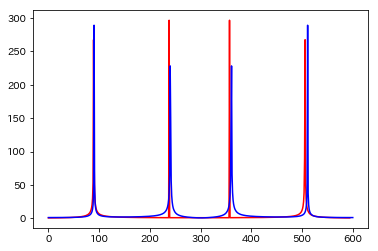

In [23]:
plt.plot(np.abs(sfft.fft(y[0:595])), color="r")
plt.plot(np.abs(sfft.fft(y[0:601])), color="b")
plt.show()

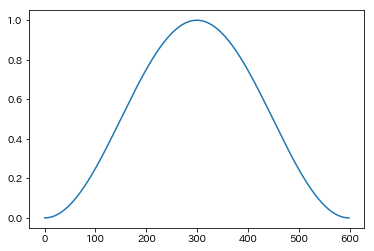

In [24]:
w = np.hanning(600)
plt.plot(w)
plt.show()

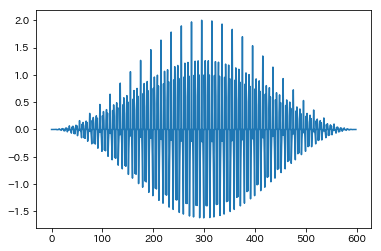

In [25]:
hy = y[0:599]*np.hanning(599)
plt.plot(hy)
plt.show()

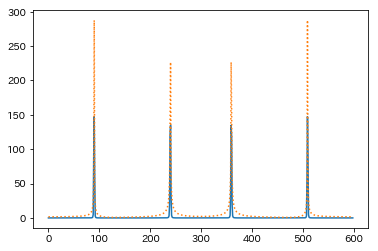

In [27]:
hcs = sfft.fft(hy)
lcs = sfft.fft(y[:599])
plt.plot(np.abs(hcs))
plt.plot(np.abs(lcs), ":")
plt.show()

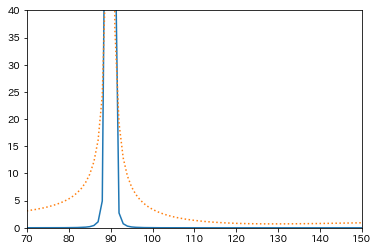

In [31]:
plt.plot(np.abs(hcs))
plt.plot(np.abs(lcs), ":")
plt.xlim(70,150)
plt.ylim(0,40)
plt.show()

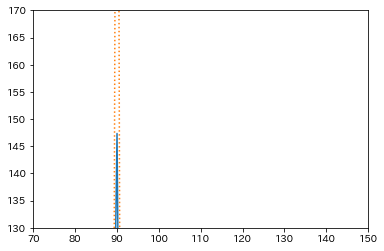

In [32]:
plt.plot(np.abs(hcs))
plt.plot(np.abs(lcs), ":")
plt.xlim(70,150)
plt.ylim(130,170)
plt.show()

窓関数によってリークが軽減された．

## 音声のフレーム処理

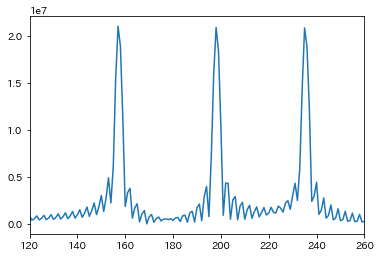

In [43]:
fs,y = wav.read('audio/domiso.wav')
plt.plot(np.abs(sfft.fft(y)))
plt.xlim(120,260)
plt.show()

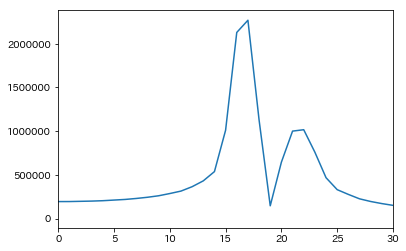

In [49]:
plt.plot(np.abs(sfft.fft(y[1300:1812]*np.hanning(512))))
plt.xlim(0,30)
plt.show()

In [51]:
S,F,T = mlab.specgram(y, Fs=fs, NFFT=256, window=np.hanning(256), noverlap=128, mode='complex', sides='twosided')
S.shape

(256, 36)

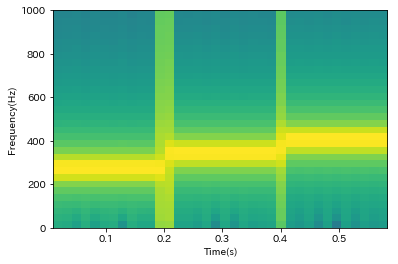

In [63]:
_,_,_,_ = plt.specgram(y, Fs=fs, NFFT=256, window=np.hanning(256), noverlap=128)
_ = plt.xlabel('Time(s)')
_ = plt.ylabel('Frequency(Hz)')
plt.ylim(0,1000)
plt.show()

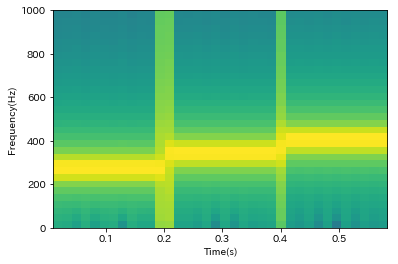

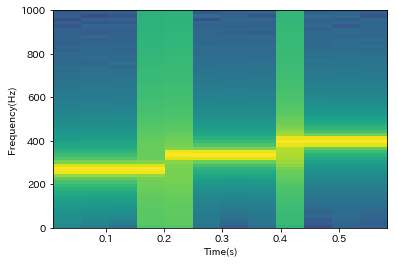

In [65]:
plt.figure(1);
P,F,T,im = plt.specgram(y, Fs=fs, NFFT=256, window=np.hanning(256), noverlap=128); plt.ylim(0,1000)
plt.ylim(0,1000); plt.xlabel('Time(s)'); plt.ylabel('Frequency(Hz)')

plt.figure(2)
P,F,T,im = plt.specgram(y, Fs=fs, NFFT=512, window=np.hanning(512), noverlap=128)
plt.ylim(0,1000); plt.xlabel('Time(s)'); plt.ylabel('Frequency(Hz)')

plt.show()

FFTの長さが長いと周波数解像度は高くなるが，時間解像度は低くなる．

## 逆フーリエ変換

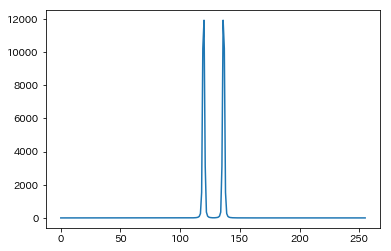

In [74]:
S09 = S[:,9]
plt.plot(np.abs(S09))
plt.show()

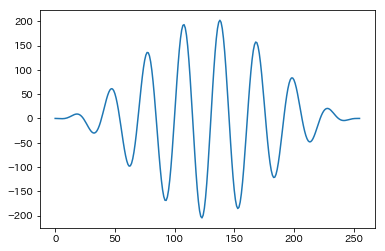

In [71]:
plt.plot(np.real(sfft.ifft(sfft.fftshift(S09))))
plt.show()

窓関数がかかった状態で復元される．

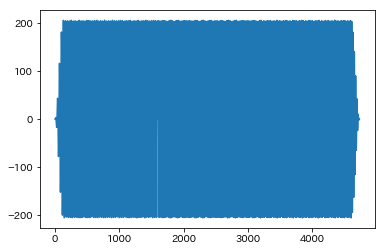

In [78]:
fs,y = wav.read('audio/domiso.wav')
fftlen = 256
noverlap = 128

S,_,_ = mlab.specgram(y, Fs=fs, NFFT=fftlen, window=np.hanning(fftlen), noverlap=noverlap, mode='complex', sides='twosided')
slen = S.shape[1]
S = sfft.fftshift(S,axes=0)
ry = np.zeros(slen*fftlen-(slen-1)*noverlap)

k1 = 0
for k in range(0, slen):
    ry[k1:k1+fftlen] = ry[k1:k1+fftlen] + np.real(sfft.ifft(S[:,k]))
    k1 = k1 + noverlap
    
plt.plot(ry)
plt.show()

In [82]:
# wav.write('test.wav', fs, ry)

音声が復元される．